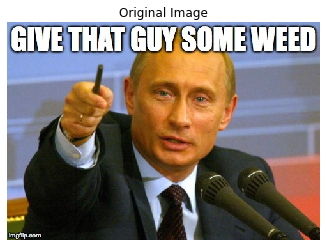

In [228]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

img_path = 'test_images/meme-0.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

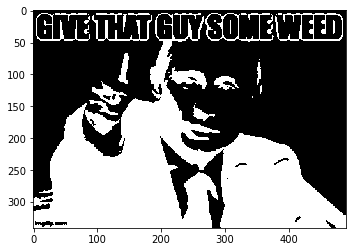

In [229]:
# Grayscale, Gaussian blur, Otsu's threshold
gray = get_grayscale(img)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

In [230]:
# Perform text extraction
data = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
print(data)

GIVESTHAT/GUY/SOME WEED)
L¢
To



In [216]:
d = pytesseract.image_to_data(thresh, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


number of boxes: 13


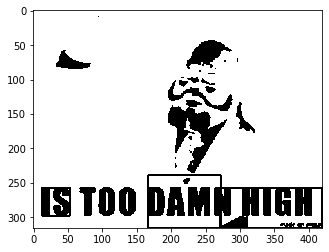

In [217]:
n_boxes = len(d['text'])
print('number of boxes: {}'.format(n_boxes))
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Region of interest basically a word in the image
        r = img[y:y+h,x:x+w]
        thresh = cv2.rectangle(thresh, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()